In [1]:
import simple

import matplotlib.pyplot as plt
import numpy as np

import logging
logging.basicConfig(level=logging.INFO)

models = simple.load_collection('TiFeNiZn.hdf5')

INFO:SIMPLE.models:Loading existing file: TiFeNiZn.hdf5
INFO:SIMPLE.models:Loading file: TiFeNiZn.hdf5
INFO:SIMPLE.models:Loading model: Ri18_m15 (CCSNe)
INFO:SIMPLE.models:Loading model: iniab2.0E-02GN93 (IsoRef)
INFO:SIMPLE.models:Loading model: W17 (IsoRef)
INFO:SIMPLE.models:Loading model: Ri18_m20 (CCSNe)
INFO:SIMPLE.models:Loading model: Ri18_m25 (CCSNe)
INFO:SIMPLE.models:Loading model: Pi16_m15 (CCSNe)
INFO:SIMPLE.models:Loading model: iniab2.0E-02GN93_Lo03 (IsoRef)
INFO:SIMPLE.models:Loading model: Pi16_m20 (CCSNe)
INFO:SIMPLE.models:Loading model: Pi16_m25 (CCSNe)
INFO:SIMPLE.models:Loading model: La22_m15 (CCSNe)
INFO:SIMPLE.models:Loading model: La22_m20 (CCSNe)
INFO:SIMPLE.models:Loading model: La22_m25 (CCSNe)
INFO:SIMPLE.models:Loading model: Si18_m15 (CCSNe)
INFO:SIMPLE.models:Loading model: iniab1.3E-02Lo03_Lo03_merged (IsoRef)
INFO:SIMPLE.models:Loading model: Si18_m20 (CCSNe)
INFO:SIMPLE.models:Loading model: Si18_m25 (CCSNe)
INFO:SIMPLE.models:Loading model: Ra02_m1

## Spaghetti plots


Same plot but this time the data is plotted in moles. If the data is initially in a mass unit the abundances will be divided by 
the mass number of the isotope. If data is stored as mole and a mass unit is requested the adundances are instead multiplied by 
the mass number.

INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


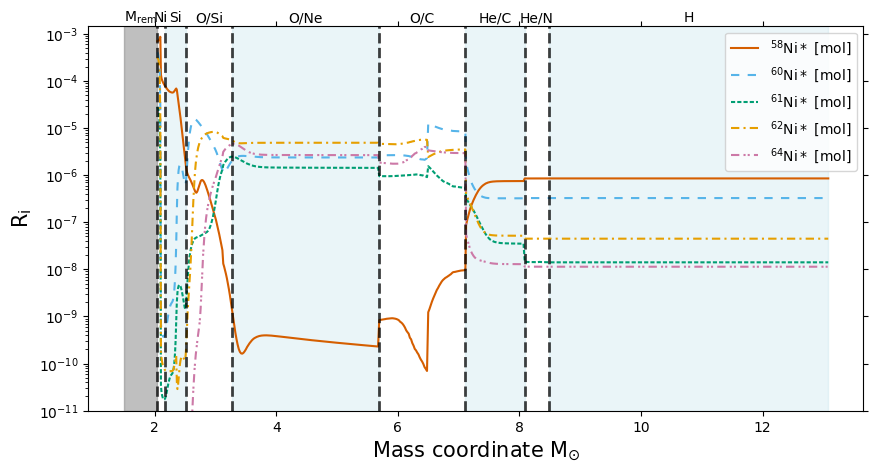

In [2]:
simple.ccsne.plot_abundance(models, 'Ni-58*, Ni-60*, Ni-61*, Ni-62*, Ni-64*', where='.mass==25 & .dataset==Ra02', unit='mol',
                            ax_ylim = (1e-11,1.5e-3), ax_yscale='log', fig_size= (10,5));

## Internally normalise data
How to internally normalise data and visualise the results

In [3]:
models.internal_normalisation('Ni-58*/Ni-61*')
models.simple_normalisation('Ni-58*')

INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
INFO:SIMPLE.norm:Internally normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to ('Ni-58*/Ni-61*',) with an enrichment factor of (1,)
INFO:SIMPLE.norm:Internally normalising 2158 rows using the largest offset method.
INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
INFO:SIMPLE.norm:Internally normalising ('Ni-58*', 'Ni-60*', 'Ni-61*', 'Ni-62*', 'Ni-64*') to ('Ni-58*/Ni-61*',) with an enrichment factor of (1,)
INFO:SIMPLE.norm:Internally normalising 2088 rows using the largest offset method.
INFO:SIMPLE.models:Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
INFO:

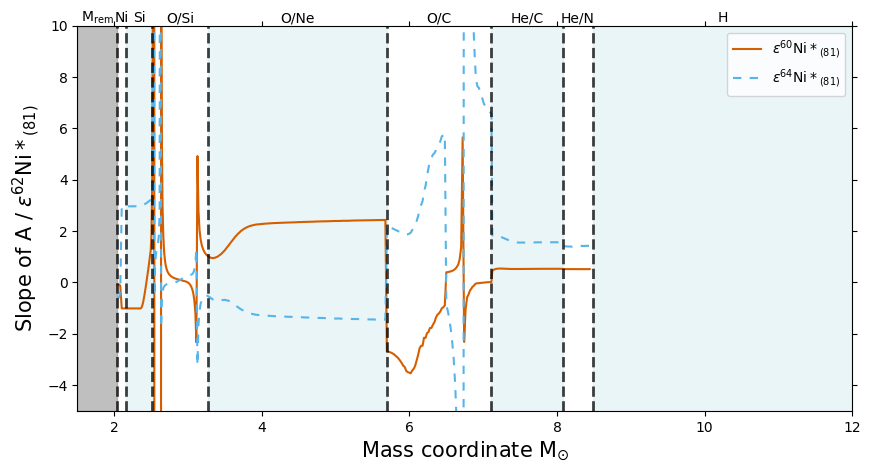

In [5]:
simple.ccsne.plot_intnorm(models, 'Ni-60*/Ni-62*, Ni-64*/Ni-62*', 
                            where='.mass==25 & .dataset == Ra02', 
                          ax_xlim=(1.5, 12), ax_ylim=(-5,10), fig_size= (10,5));

## Histogram of slopes
How to create rose diagrams

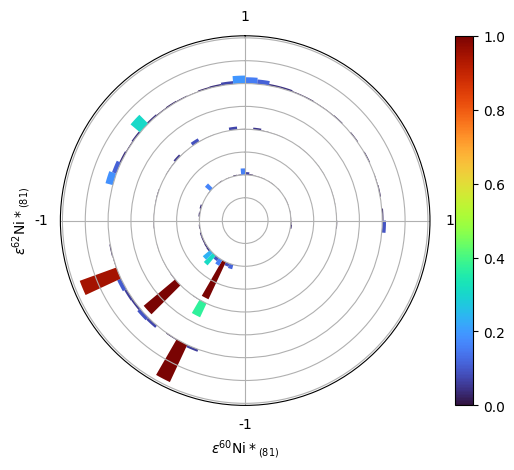

In [6]:
ax = simple.mhist_intnorm(models, 'Ni-60*', 'Ni-62*', 
                                where='.dataset == Ra02')

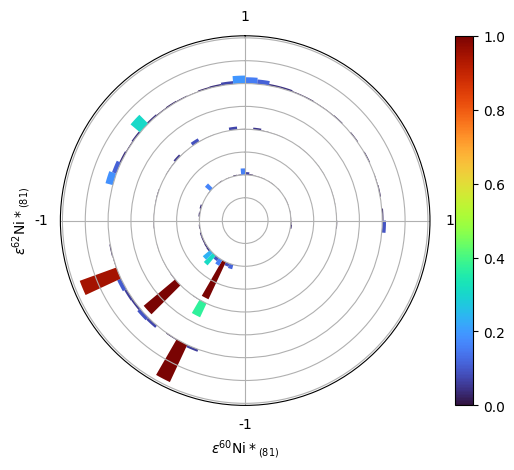

In [7]:
ax = simple.mhist_intnorm(models, 'Ni-60*', 'Ni-62*', 
                                where='.dataset == Ra02')

INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isotope mass number to convert from mass to mole
INFO:SIMPLE.plot:Dividing data by the isoto

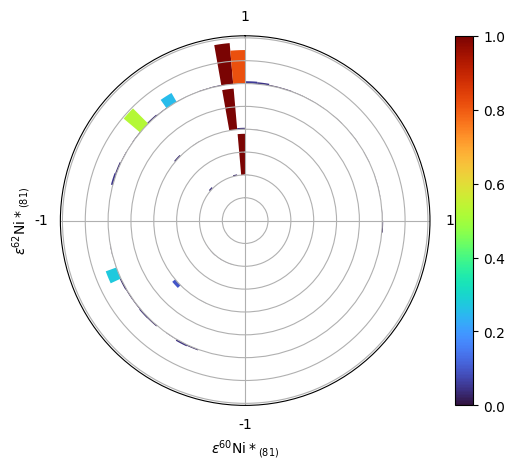

In [8]:
ax = simple.mhist_intnorm(models, 'Ni-60*', 'Ni-62*', 
                                where='.dataset == Ra02', weights='Ni*')